# **순차 데이터(sequential data)**

순차 데이터는 텍스트나 **시계열 데이터(time series data)**와 같이 순서에 의미가 있는 데이터를 뜻한다.

Ex) 예를 들어 "I am a boy"는 쉽게 이해할 수 있지만 "boy am a I"는 말이 되지 않는다.

순차 데이터

1.   텍스트 : "I am a boy"
2.   시계열 : 1일 15도, 2일 17도, 3일 16도


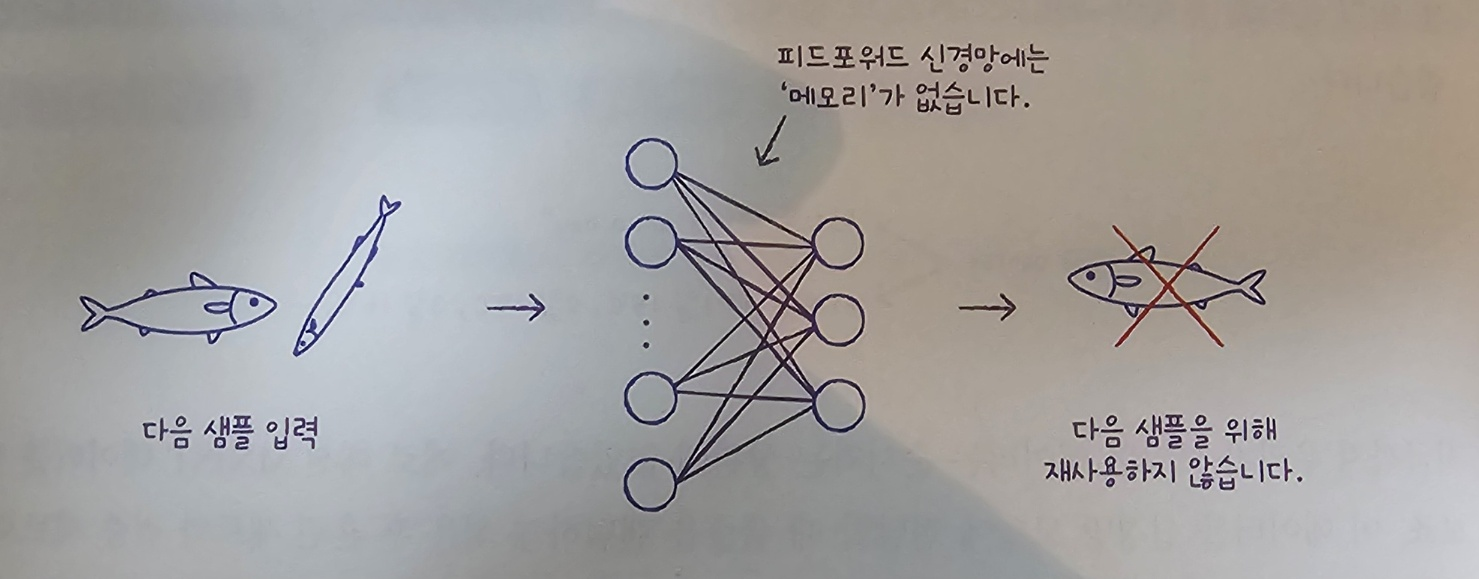

**피드포워드 신경망(feedforward neural network)**

완전 연결 신경망이나 합성곱 신경망은 기억장치가 없다. 하나의 샘플(배치)을 사용하여 정방향 계산을 수행하고 나면 샘플은 버려지고 재사용하지 않는다.

이러한 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 피드포워드 신경망이라고 한다.


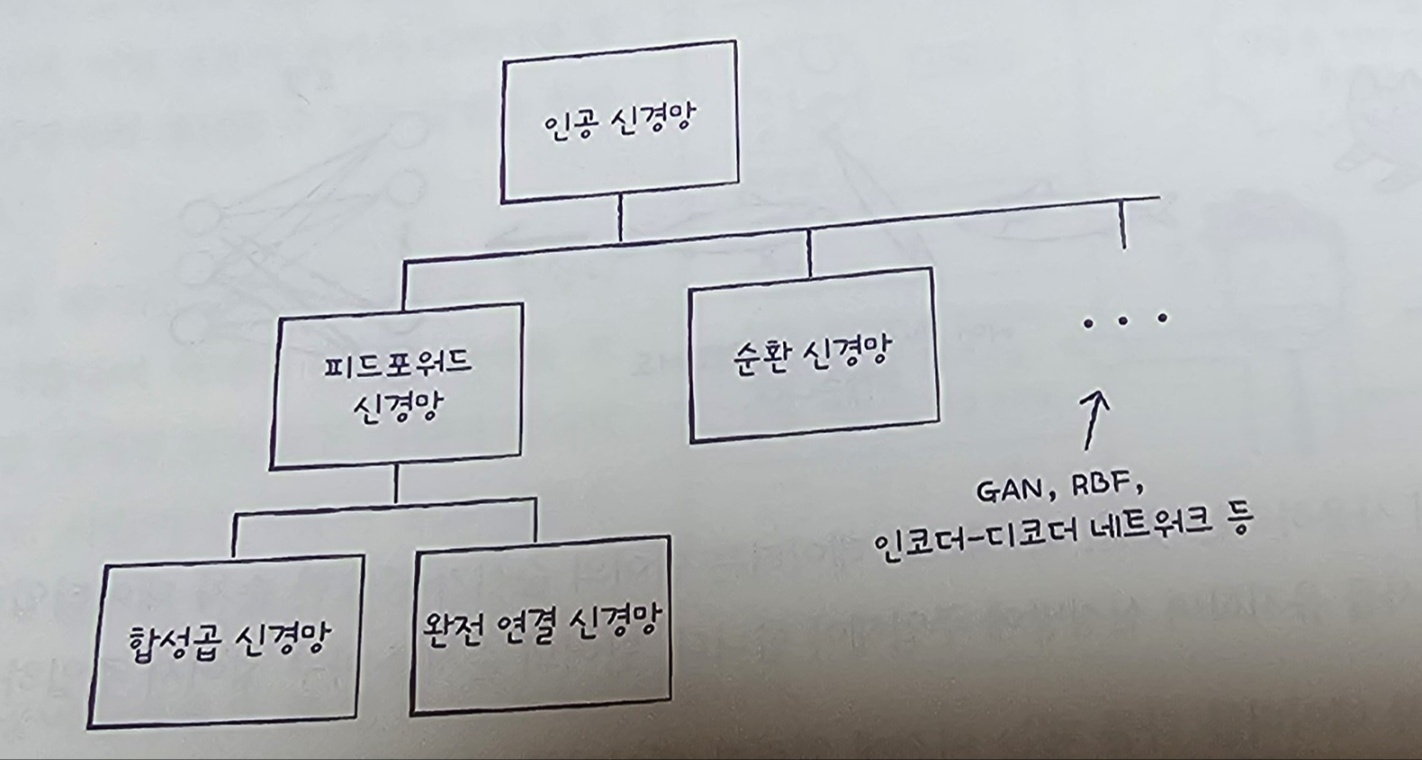



---



# **순환 신경망(Recurrent neural network)**

순환 신경망은 일반적인 완전 연결 신경망과 거의 비슷하다.

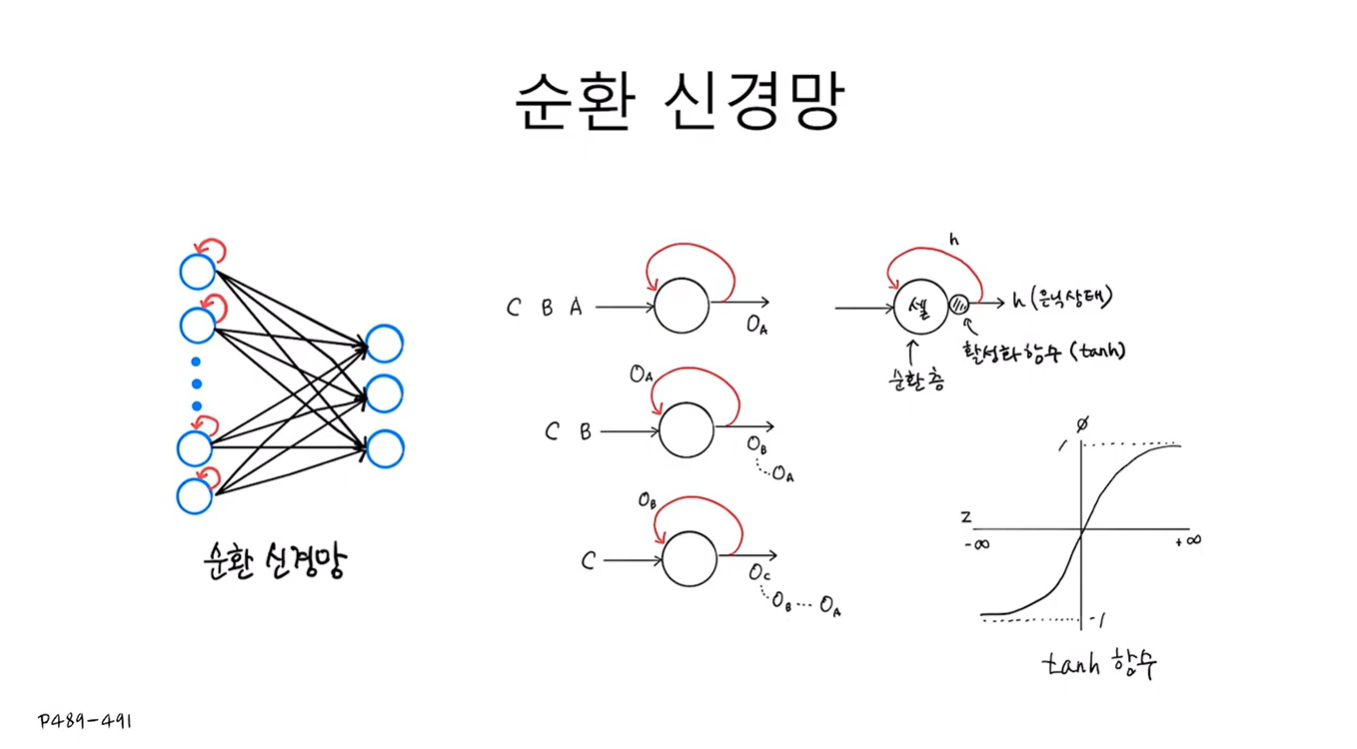

완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 된다.

뉴런의 출력이 다시 자기 자신으로 전달이 된다. 즉, 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용하는 것이다.

예를 들어
A,B,C 3개의 샘플을 처리하는 순환 신경망 뉴런이 있을 때

1.   첫 번째 샘플 A를 처리하고 난 출력 OA가 뉴런으로 들어간다.
2.   그 다음 B를 처리할 때 A를 사용해서 만든 출력 OA를 함께 사용한다.
3.   따라서 OA와 B를 사용해 만든 OB에는 A에 대한 정보가 포함되어 있을 것이다.
4.   그 다음 C를 처리할 때 OB를 사용한다,
5.   OB와 C를 사용해 만든 OC에는 B와 A에 대한 정보가 담겨진다.

OC에는 A에 대한 정보보다는 B에 대한 정보가 더 많을 것이다. 따라서 순환 신경망에서는 '이전 샘플에 대한 기억을 가지고 있다'고 말하는데 이렇게 샘플을 처리하는 한 단계를 **타입스텝(timestep)**이라고 말한다,






---



순환 신경망은 이전 타입스텝의 샘플을 기억하지만 타입스텝이 오래될수록 순환되는 정보는 희미해진다.

순환 신경망에서는 특별히 층을 셀(cell)이라고 부른다. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현한다.

셀의 출력을 **은닉 상태(hidden state)**라고 한다.

은닉층의 활성화 함수로는 **하이퍼볼릭 탄젠트(hyperbolic tangent)**함수를 사용한다.

범위는 (-1,1)를 가진다.

합성곱 신경망과 같은 피드포워드 신경망에서 뉴런은 입력과 가중치를 곱한다. 순환 신경망에서도 동일한데, 순환 신경망의 뉴런은 가중치가 하나 더 있다.

이전 타임스텝의  은닉 상태에 곱해지는 가중치이다.

셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만든다.

wx는 입력에 곱해지는 가중치이고 wb는 이전 타임스텝의 은닉 상태에 곱해지는 가중치이다.

피드포워드 신경망과 마친가지로 뉴런마다 하나의 절편이 포함된다.

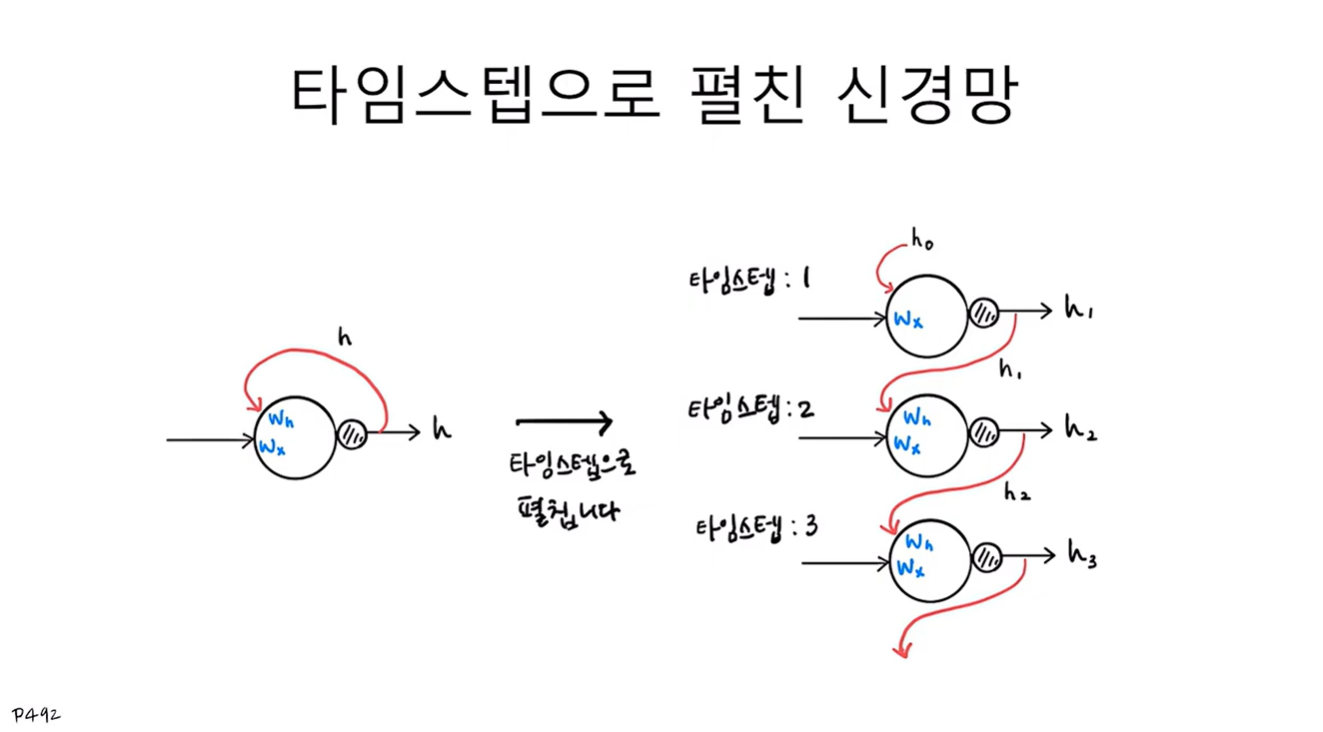



1.   타임스텝 1에서 셀의 출력 b1이 타임스텝 2의 셀로 주입된다.
2.   이 때 wb와 곱해진다.
3.   마찬가지로 타임스텝 2에서 셀의 출력 b2가 타임스텝 3의 셀로 주입된다.
4.   이 때에도 wb와 곱해진다.

모든 타임스텝에서 사용되는 가중치는 wb하나인데 가중치 wb는 타임스텝에 따라 변화되는 뉴런의 출력을 학습한다.

*맨 처음 타임 스텝 1에서 사용되는 이전 은닉 상태 h0은 모두 0으로 초기화 한다.





---



# **셀의 가중치와 입출력**



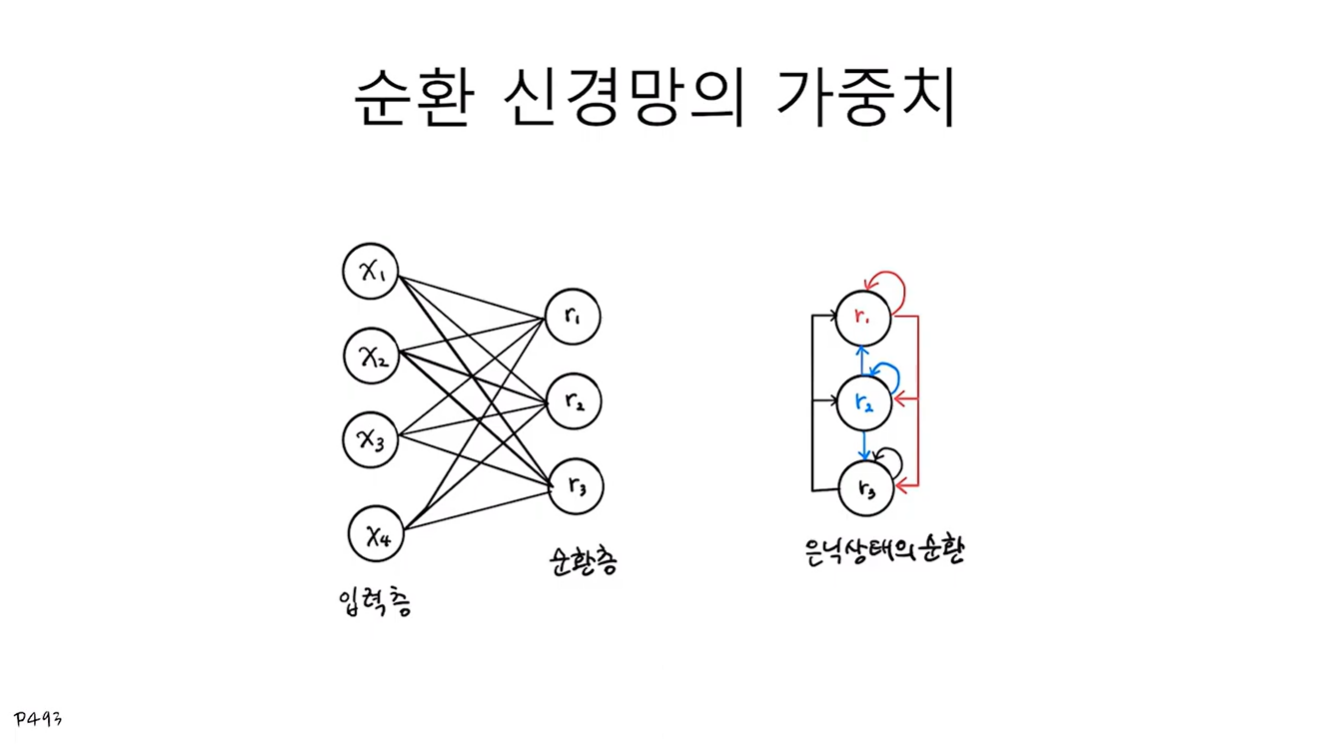

위 그림을 예를 들어

특성의 개수가 4개이고 순환층 뉴런이 3로 가정해보자

먼저 wx의 크기는 4 x 3으로 12개가 된다.

은닉 상태를 위한 가중치 wb의 크기는



1.  첫 번째 뉴런(r1)의 은닉 상태가 다음 타임스텝에 재사용 될 때 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달된다.(빨간 화살표)
2.  두 번재  뉴런의 은닉 상태도 마찬가지로 첫 번째 뉴런과 두 번재 뉴런, 세 번째 뉴런에 모두 전달되고(파란 화살표)
3.  세번째 뉴런의 은닉 상태도 동일하다(검은색 화살표)

따라서 이 순환층에서 은닉상태를 위한 가중치 wb는 3 x 3 = 9개 이다.

가중치를 다 구했으면 모델 파라미터의 개수를 계산해보겠다.

가중치에 절편을 더하면 12(가중치, wx) + 9(은닉 상태 가중치, wb) + 3(절편) = 24







---



#**순환층의 입력과 출력**

순환층은 일반적으로 샘플마다 2개의 차원을 가진다. 보통 하나의 샘플을 하나의 시퀀스(sequence)라고 한다.

시퀀스 안에는 여러 개의 아이템이 들어 있다. 여기서 시퀀스의 길이가 바로 타임스텝 길이가 된다.

ex) 샘플에 " I am a boy"라는 문장이 들어 있다고 가정

1.   샘플은 4개의 단어로 구성, 각 단어를 3개의 어떤 숫자로 표현한다고 가정
2.   입력이 순환층을 통과하면 두 번째, 세 번째 차원이 사라지고 뉴런의 개수만큼 출력이 된다.



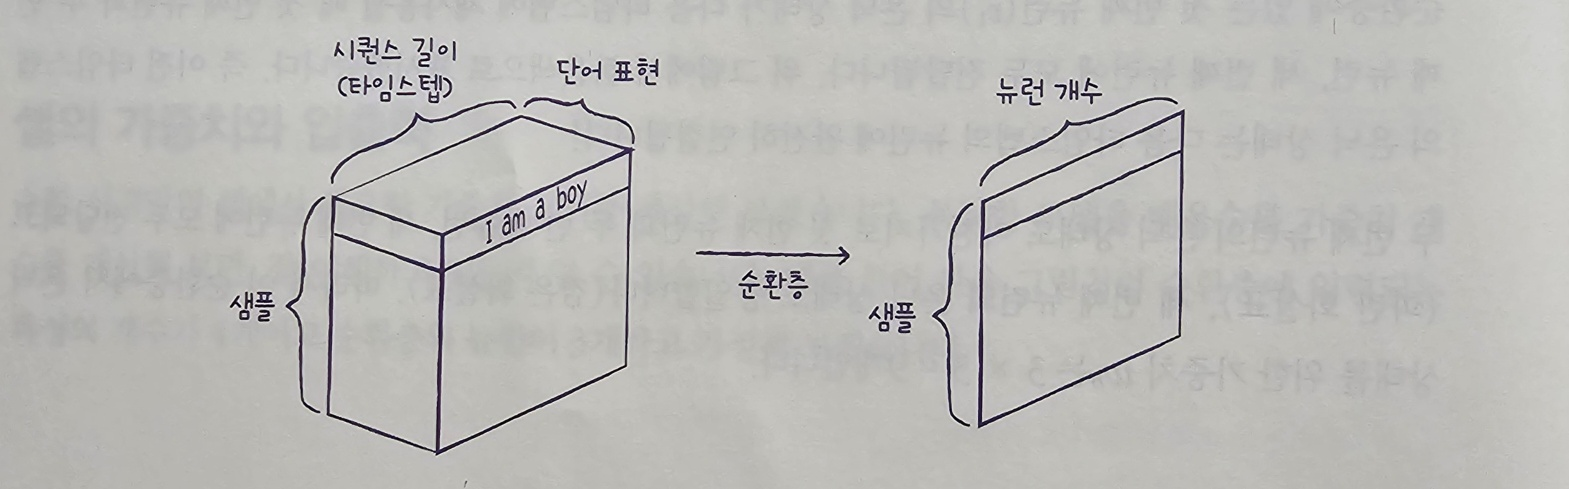

하나의 샘플은 시퀀스 길이(단어 개수)와 단어 표현의 2차원 배열이다.

순환층을 통과하면 1차원 배열로 바뀌는데 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정이 된다.

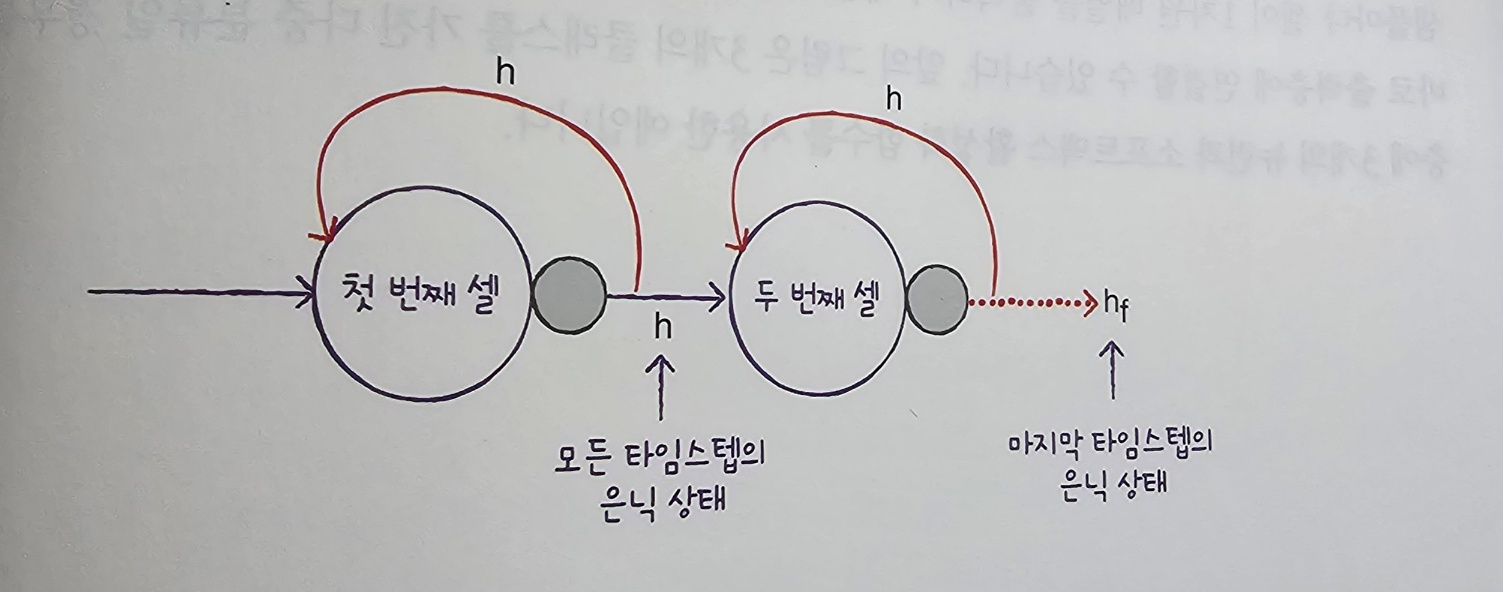

위 그림은 여러 개의 층으로 이루어진 순환 신경망이다.

순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다.

이는 마치 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달하는 것처럼 볼 수 있다.

첫 번째 셀은 모든 타입스텝의 은닉상태를 출력

두 번째 셀은 마지막 타임스텝의 은닉 상태만을 출력한다.

---



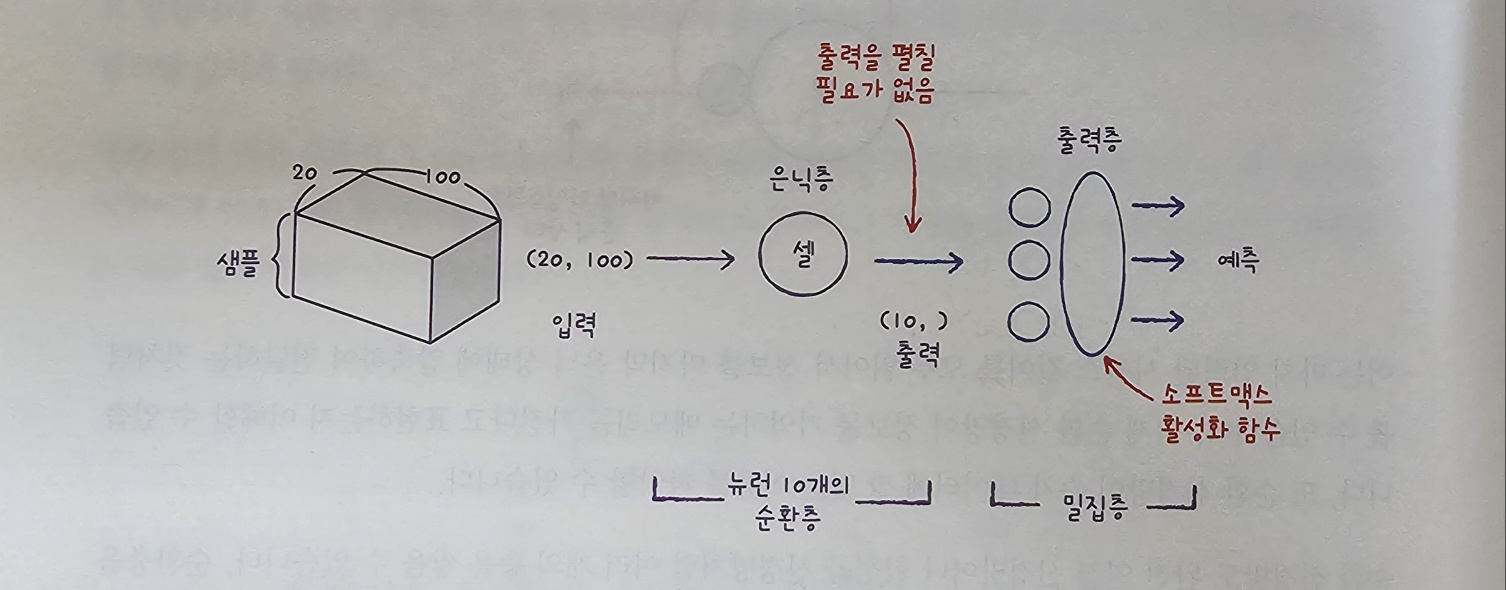

#**순환 신경망의 출력층**

합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류한다.

다중 분류 : 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활설화 함수 사용

이진 분류 : 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용

샘플마다 셀이 1차원 배열을 출력하기 때문에 Flatten클래스로 펼칠 필요가 없다.